In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#DATA
train=pd.read_csv("../input/titanic/train.csv")
test=pd.read_csv("../input/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


 # **EDA**

In [5]:
#check for missing data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

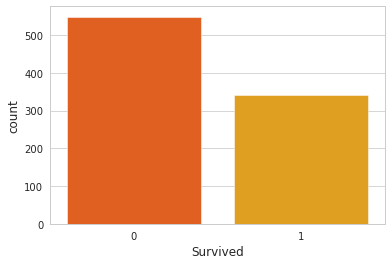

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='autumn')

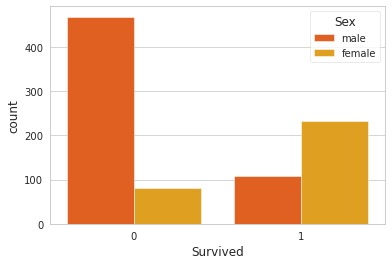

In [8]:
#survival dependent on gender
#0=Died, 1=Alive
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='autumn')

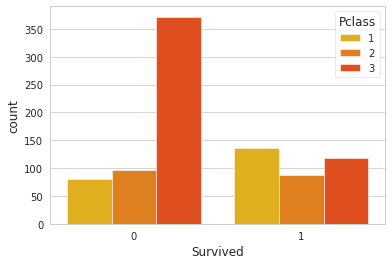

In [9]:
#survival dependent on passenger class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='autumn_r')

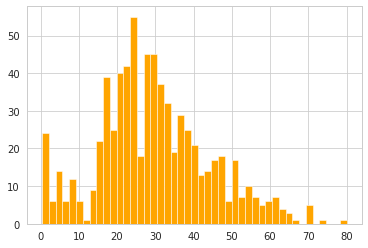

In [10]:
#distrbution of ages of passengers
train['Age'].hist(bins=45, color='orange')

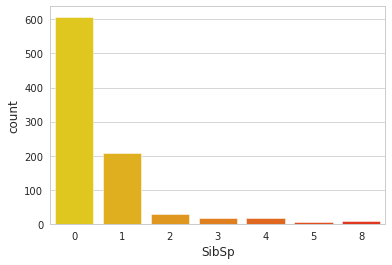

In [11]:
#distribution of Sibilings and Spouse
sns.countplot(x='SibSp',data=train, palette='autumn_r')

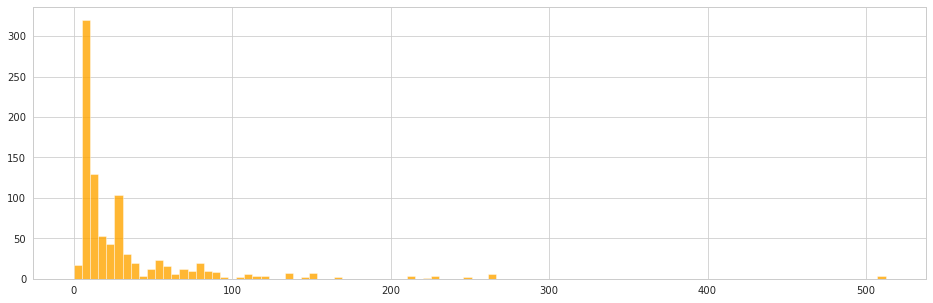

In [12]:
#Approximately average fare
train['Fare'].hist(color='orange', bins=100, alpha=0.8, figsize=(16,5))

# **Filling in missing values for age**

In [13]:
#TRAINING SET
import plotly.express as px
px.violin(train, x='Pclass', y='Age', color='Pclass', box=True, hover_data=train)

In [14]:
#Replacing NAN values with
#Pclass=1, Age=37
#Pclass=2, Age=29
#Pclass=3, Age=24
def fill_age(data):#data will consist of Age and Pclass respectively
    age=data[0]
    Pclass=data[1]
    if pd.isnull(age):
        if Pclass==1:  
            return 37
        elif Pclass==2:  
            return 29
        else:  
            return 24
    else:
        return age

In [15]:
train['Age']=train[['Age', 'Pclass']].apply(fill_age, axis=1)

In [16]:
px.violin(test, x='Pclass', y='Age', color='Pclass', box=True, hover_data=test)

In [17]:
#Replacing NAN values with
#Pclass=1, Age=42
#Pclass=2, Age=26.5
#Pclass=3, Age=24
def fill_age1(data):#data will consist of Age and Pclass respectively
    age=data[0]
    Pclass=data[1]
    if pd.isnull(age):
        if Pclass==1:  
            return 42
        elif Pclass==2:  
            return 26.5
        else:  
            return 24
    else:
        return age

In [18]:
test['Age']=test[['Age', 'Pclass']].apply(fill_age1, axis=1)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [21]:
#since Cabin is an alphanumeric data and it consists of huge NAN values, it will be difficult to replace, hence we drop it
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [22]:
test['Fare'].mean

<bound method Series.mean of 0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64>

In [23]:
#A Fare value is missing, we shall replace it with the median value
test['Fare']=test['Fare'].fillna(7.8292)
test['Fare']=test['Fare'].astype('float')

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


# **Converting Sex and Embarked in to Categorical Values**

In [28]:
#for Embarked
'''dropped the first column because thee categoriescan be represented by 
00 for C
10 for Q
01 for S'''
embark_train=pd.get_dummies(train['Embarked'], drop_first=True)
embark_test=pd.get_dummies(test['Embarked'], drop_first=True)

In [29]:
#For Sex
'''1 for male
0 for female'''
sex_train=pd.get_dummies(train['Sex'], drop_first=True)
sex_test=pd.get_dummies(test['Sex'], drop_first=True)

In [30]:
#dropping the Name, Ticket, Sex and Embarked column
train.drop(['Sex', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
test.drop(['Sex', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [31]:
#appending the new categorical columns to dataframe
train=pd.concat([train, embark_train, sex_train], axis=1)
test=pd.concat([test, embark_test, sex_test], axis=1)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


In [33]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,892,3,34.5,0,0,7.8292,1,0,1
1,893,3,47.0,1,0,7.0000,0,1,0
2,894,2,62.0,0,0,9.6875,1,0,1
3,895,3,27.0,0,0,8.6625,0,1,1
4,896,3,22.0,1,1,12.2875,0,1,0


# ****TRAINING****

In [34]:
X_train=train.drop('Survived', axis=1)
y_train=train['Survived']
X_test=test

In [35]:

#testing with the actual submission
submit=pd.read_csv('../input/titanic/gender_submission.csv')
y_test=submit['Survived']

# 1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
acc_lr=round(accuracy_score(y_test, y_pred_lr)*100, 2)
acc_lr

93.54

# 2. Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)

In [39]:
acc_rf=round(accuracy_score(y_test, y_pred_rf)*100, 2)
acc_rf

78.47

# 3. Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [41]:
acc_dt=round(accuracy_score(y_test, y_pred_dt)*100, 2)
acc_dt

78.23

# 4. XGBoost

In [42]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)

In [43]:
acc_xg=round(accuracy_score(y_test, y_pred_xg)*100, 2)
acc_xg

83.49

# 5. SVM

In [44]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train, y_train)
y_pred_svm=svc.predict(X_test)

In [45]:
acc_svm=round(accuracy_score(y_test, y_pred_svm)*100, 2)
acc_svm

65.07

# 6. Stochastic Gradient Descent

In [46]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd=sgd.predict(X_test)

In [47]:
acc_sgd=round(accuracy_score(y_test, y_pred_sgd)*100, 2)
acc_sgd

64.83

# 7. KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

In [49]:
acc_knn=round(accuracy_score(y_test, y_pred_knn)*100, 2)
acc_knn

63.4

# 8. Gaussian Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb=nb.predict(X_test)

In [51]:
acc_nb=round(accuracy_score(y_test, y_pred_nb)*100, 2)
acc_nb

91.39

# 9. Perceptron

In [52]:
from sklearn.linear_model import Perceptron
per=Perceptron()
per.fit(X_train, y_train)
y_pred_per=per.predict(X_test)

In [53]:
acc_per=round(accuracy_score(y_test, y_pred_per)*100, 2)
acc_per

65.07

# 10. Linear SVM

In [54]:
from sklearn.svm import LinearSVC
lin_svm=LinearSVC(penalty="l1",dual=False,max_iter=100000)
lin_svm.fit(X_train, y_train)
y_pred_lin_svm=lin_svm.predict(X_test)

In [55]:
acc_lin_svm=round(accuracy_score(y_test, y_pred_lin_svm)*100, 2)
acc_lin_svm

95.69

# Sorting the models according to accuracy score

In [56]:
sorted_models=pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree',
              'XG Boost', 'SVM', 'Stochastic Gradient Decent', 'KNN',
              'Naive Bayes', 'Perceptron', 'Linear SVC'],
    'Score': [acc_lr, acc_rf, acc_dt, acc_xg, acc_svm, 
              acc_sgd, acc_knn, acc_nb, acc_per, acc_lin_svm]})
sorted_models=sorted_models.sort_values(by='Score', ascending=False)
print(sorted_models.to_string(index=False))

                      Model  Score
                 Linear SVC  95.69
        Logistic Regression  93.54
                Naive Bayes  91.39
                   XG Boost  83.49
              Random Forest  78.47
              Decision Tree  78.23
                        SVM  65.07
                 Perceptron  65.07
 Stochastic Gradient Decent  64.83
                        KNN  63.40


<BarContainer object of 10 artists>

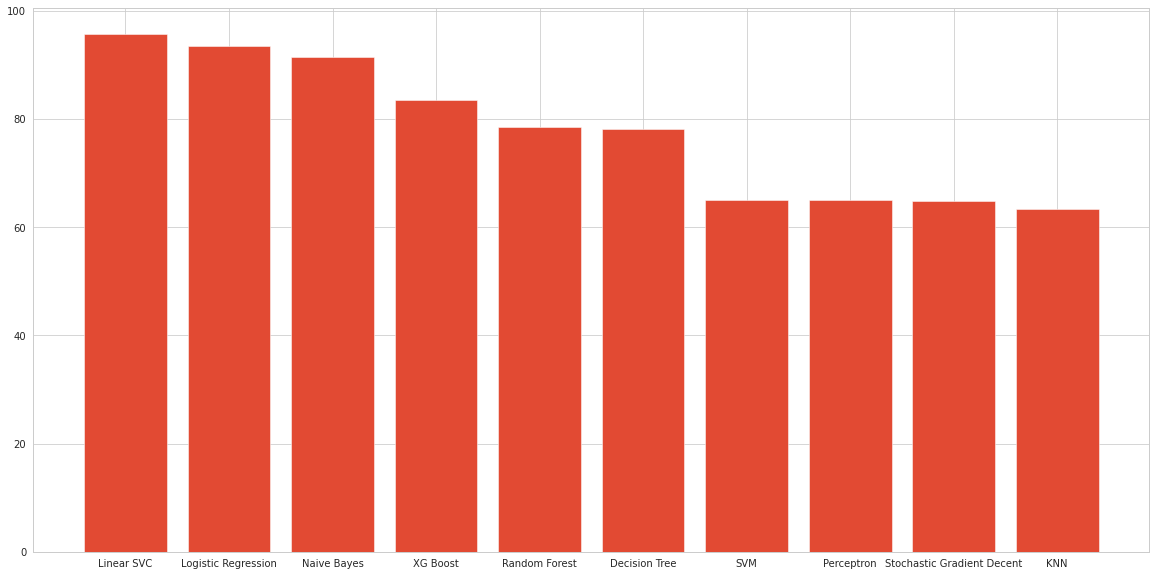

In [57]:
plt.figure(figsize=(20,10))
plt.bar(sorted_models['Model'], sorted_models['Score'])

# **Creating CSV for Submission**

In [58]:
submission=pd.DataFrame({'PassengerId':X_test['PassengerId'],
                         'Survived':y_pred_xg})
submission.to_csv('submission.csv', index=False)

In [59]:
submission=pd.read_csv('submission.csv')
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
